<a href="https://colab.research.google.com/github/oldairjsilva/IGTI/blob/main/Pratica_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regressao Linear
Aula prática de regressao linear. O objetivo é prever o custo da diária de um imóvel ao número de pessoas

In [1]:
# Importando as bibliotecas
import pandas as pd # Trabalhar com tabelas e importação dos arquivos utilizados
import plotly.express as px # Bibliotecas para criar gráficos dinâmicos
import seaborn as sns # Biblioteca para gráficos
import numpy as np # Funções matematicas de alto nível

Abrindo o arquivo contendo os dados utilizados na regressão

In [7]:
base_custo_diaria = pd.read_csv('base_custo_diaria.csv', sep = ';')

In [8]:
# Visualizando arquivos da base de dados
base_custo_diaria.head

<bound method NDFrame.head of     qtd_pessoas  valor_diaria
0             1           150
1             4           385
2             6           499
3            10           680
4            13           735
5            15           859
6            18           989
7            22          1075
8            25          1500
9            30          1850
10           40          2000
11           42          2089
12           45          2250
13           47          2488
14           50          2680>

In [9]:
# Algumas estatisticas da base de dados
base_custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


In [10]:
# Criando variavel independente
X_custo_diaria = base_custo_diaria.iloc[:,0].values # Buscamos todos os registros da primeira coluna e convertemos no formato de array
# O comando iloc permite selecionar um conjunto de registros. O dois pontos ':' significa que estamos selecionando todos os registros e zero '0' a primeira coluna
X_custo_diaria

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [11]:
# Criando variavel dependente (o que queremos predizer)
y_custo_diaria = base_custo_diaria.iloc[:, 1].values
y_custo_diaria

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680])

In [12]:
np.corrcoef(X_custo_diaria, y_custo_diaria) # Mostra uma matriz

array([[1.        , 0.99206905],
       [0.99206905, 1.        ]])

## Correlação
Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;
Correlação negativa: quando duas variáveis que possuem correlação mas quando uma crece a outra decresce, ou vice_versa;
Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.

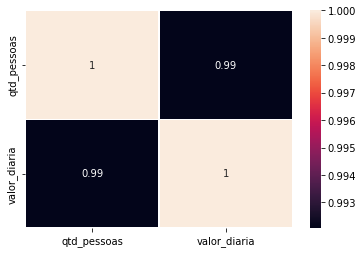

In [13]:
correlation = base_custo_diaria.corr()
# Plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, linewidths=.3)
plot

Perceba que temos uma correlação forte positiva. Pois a medida que a quantidade de pessoas aumenta o preço da diária também aumenta.
Além disso, podemos dizer que em 99% do valor cobrado pelas diárias pode ser explicado pela quantidade de pessoas alugando o imóvel.

## Tratando os dados para o modelo
Nesse passo vamos realizar transformação nos dados. Essa transformação deve ser feita para que os dados possam ter o formato que o algoritmo solicita como entrada.

In [14]:
# Visualizar o formato da variável
X_custo_diaria.shape

(15,)

In [15]:
# Visualizar variavel
X_custo_diaria # o resultado mostra que temos uma array com apenas uma coluna/dimensão. No entanto, precisamos ter uma matriz com 2 colunas

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [16]:
X_custo_diaria = X_custo_diaria.reshape(-1,1)
X_custo_diaria

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [17]:
# Agora nós temos uma matriz com duas colunas. 10 linhas e uma coluna
X_custo_diaria.shape

(15, 1)

## Aplicando os dados ao algoritmo de machine de regressão

In [18]:
from sklearn.linear_model import LinearRegression
# Cria um objeto do tipo regressão linear
previsao_custo_diaria = LinearRegression()

In [19]:
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

## Realizando o Treinamento do modelo

In [20]:
previsao_custo_diaria.fit(X_custo_diaria, y_custo_diaria)

LinearRegression()

In [21]:
# Verificando a interceptação
previsao_custo_diaria.intercept_

155.91874556932066

In [22]:
# Verificando o coeficiente angular da reta
previsao_custo_diaria.coef_

array([48.61472504])

In [23]:
previsao_precos = previsao_custo_diaria.predict(X_custo_diaria) # Baseado nos valores de numero de pressoas, vamos estimar/prever o custo do imovel alugado

In [24]:
# Visualizacao das previsoes para cada numero de pessoas
previsao_precos

array([ 204.53347061,  350.37764575,  447.60709584,  642.06599602,
        787.91017115,  885.13962124, 1030.98379637, 1225.44269655,
       1371.28687169, 1614.36049691, 2100.50774736, 2197.73719745,
       2343.58137258, 2440.81082267, 2586.65499781])

## Visualizando no gráfico as disposições dos dados
Para visualizar os dados no grafico, temos que transformar os valores das variaveis para o formato de vetor. Para isso utilizamos o comando ravel()

In [25]:
# Verificando tipo da variavel X_custo_diaria
X_custo_diaria

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [26]:
X_custo_diaria.ravel() # Transforma em um vetor

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [27]:
y_custo_diaria

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680])

In [28]:
grafico = px.scatter(x = X_custo_diaria.ravel(), y = y_custo_diaria)
grafico.show()

In [29]:
grafico = px.scatter(x = X_custo_diaria.ravel(), y = y_custo_diaria)
grafico.add_scatter(x = X_custo_diaria.ravel(), y = previsao_precos, name = 'previsões')
grafico.show()

In [30]:
# Verificando os valores de uma determinada previsão baseada na quantidade de pessoas
qtde_pessoas = 4
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtde_pessoas

array([350.37764575])

In [31]:
qtde_pessoas = 8
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtde_pessoas

array([544.83654593])

In [32]:
# Verificando de modo direto
previsao_custo_diaria.predict([[8]])

array([544.83654593])

In [33]:
# Indica a qualidade do algoritmo (Quanto mais proximo de 1, melhor a qualidade do modelo)
previsao_custo_diaria.score(X_custo_diaria, y_custo_diaria)

0.984200996064679

In [34]:
# Visualizando os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_custo_diaria, previsao_precos)

In [35]:
MSE

9989.829839426571

In [36]:
# Calculando MAE
mean_absolute_error(y_custo_diaria, previsao_precos)

83.84480977618742

In [37]:
# Calculando RMSE
np.sqrt(MSE)

99.9491362615334